In [45]:
# Importación de librerias

import mlflow
from mlflow.models import infer_signature

import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Información del dataset

Here’s the table in Markdown format:  


| Feature                         | Type   |
|----------------------------------|--------|
| is_male                         | bool   |
| ethnicity                       | string |
| parental_level_of_education     | int8   |
| has_standard_lunch              | bool   |
| has_completed_preparation_test  | bool   |
| reading_score                   | int64  |
| writing_score                   | int64  |
| math_score                      | int64  |


In [2]:
# Carga del dataset de resultados de matemáticas

dataset = load_dataset("mstz/student_performance", "math")
dataset = dataset['train'].to_pandas()

#Validación de la carga del dataset

dataset.head()


,is_male,ethnicity,parental_level_of_education,has_standard_lunch,has_completed_preparation_test,reading_score,writing_score,has_passed_math_exam
0,False,group D,2,True,True,70,78,0
1,True,group D,5,True,False,93,87,1
2,False,group D,2,False,False,76,77,0
3,True,group B,2,False,False,70,63,1
4,False,group D,5,True,False,85,86,1


In [3]:
# Definición de las variables de entrada y salida
X=dataset.drop('has_passed_math_exam',axis=1)
y=dataset['has_passed_math_exam']


In [4]:
# Codificación de las variables categoricas

categoricas = ['ethnicity', 'parental_level_of_education']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
Xenco = encoder.fit_transform(X[categoricas])
Xenco_df = pd.DataFrame(Xenco , columns=encoder.get_feature_names_out(categoricas))

# Reemplazo de las variables originales por las codificadas
X = X.drop(categoricas, axis=1)
X = pd.concat([X, Xenco_df], axis=1)

In [20]:
# Separación del dataset para entrenamiento y validación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definición del modelo de DecisionTree para la predicción de la variable y

params = {
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

modelo = DecisionTreeClassifier(**params) #Iniciación del modelo
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test) #Predicción de los datos de prueba

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Calculo de las función de perdida de la variable y

y_train_proba = modelo.predict_proba(X_train)
y_test_proba = modelo.predict_proba(X_test)

cse_train = log_loss(y_train, y_train_proba)
cse_test = log_loss(y_test, y_test_proba)


In [ ]:
"""
# Definición del modelo de DecisionTree para la predicción de la variable y


paramsMLP = {
    'hidden_layer_sizes': (64, 32),  # Two hidden layers (64 & 32 neurons)
    'activation': 'relu',  # ReLU activation
    'solver': 'adam',  # Adam optimizer
    'alpha': 0.0001,  # L2 regularization
    'batch_size': 32,  # Mini-batch size
    'learning_rate_init': 0.01,  # Initial learning rate
    'max_iter': 1,  # Number of epochs
    'random_state': 42
}

modeloMLP = MLPClassifier(**paramsMLP)

# Almacenar perdidas de training y validación

EPOCHS = 200

train_losses = []
test_losses = []

for i in range(EPOCHS):
    modeloMLP.fit(X_train, y_train)
    train_loss = modeloMLP.loss_
    train_losses.append(train_loss)
        
    test_loss = modeloMLP.loss_
    test_losses.append(test_loss)


#modeloMLP.fit(X_train, y_train)

y_predMLP = modeloMLP.predict(X_test) #Predicción de los datos de prueba

accuracyMLP = accuracy_score(y_test, y_predMLP)
precisionMLP = precision_score(y_test, y_predMLP) 
recallMLP = recall_score(y_test, y_predMLP)
f1MLP = f1_score(y_test, y_predMLP)

"""

c:\Users\lfcb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lfcb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lfcb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lfcb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lfcb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_percept

In [47]:
# Definición del modelo de red neuronal para la predicción de la variable y
modeloKeras = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Ajuste de las variables en booleans para la red neuronal

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Compilación del modelo
modeloKeras.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo con historial
EPOCHS = 100
history = modeloKeras.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, y_test))

# Evaluación del modelo
y_predNN = (modeloKeras.predict(X_test) > 0.5).astype("int32")
accuracyNN = accuracy_score(y_test, y_predNN)
precisionNN = precision_score(y_test, y_predNN)
recallNN = recall_score(y_test, y_predNN)
f1NN = f1_score(y_test, y_predNN)

# Imprimir métricas
txt = f"""
Accuracy: {accuracyNN:.4f}
Precision: {precisionNN:.4f}
Recall: {recallNN:.4f}
F1 Score: {f1NN:.4f}
"""
print(txt)

# Almacenar historial de pérdidas
train_losses = history.history['loss']
val_losses = history.history['val_loss']

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 2.3388 - accuracy: 0.5713 - val_loss: 0.6806 - val_accuracy: 0.7300
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.6375 - val_loss: 0.5510 - val_accuracy: 0.7300
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.6862 - val_loss: 0.5318 - val_accuracy: 0.7300
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.6925 - val_loss: 0.5228 - val_accuracy: 0.7300
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.6900 - val_loss: 0.5382 - val_accuracy: 0.7250
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.6975 - val_loss: 0.5060 - val_accuracy: 0.7300
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.6988 - val_loss: 0.5013 - val_accuracy: 0.7300
Epoch 8/100


# Monitoreo con Ml-Flow

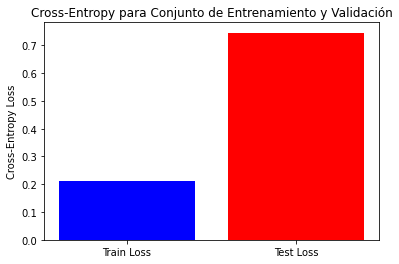

c:\Users\lfcb\anaconda3\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/03 00:10:16 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\lfcb\AppData\Local\Temp\tmps2updi9k\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn=

🏃 View run inquisitive-colt-171 at: http://127.0.0.1:5000/#/experiments/637180681266901908/runs/e5f2ab32540b41e2890f6ea9d6503a05
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/637180681266901908


Created version '5' of model 'matematicas-decision-tree'.


In [ ]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

# Create a new MLflow Experiment
mlflow.set_experiment("Predicción del Rendimiento del Estudiante en el Matemáticas")

# Start an MLflow run
with mlflow.start_run():
    '''''

    '''
    # Log the hyperparameters
    mlflow.log_params(params)

    # Métricas de precision del modelo
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    
    # Grafica de las funciones de pérdida  
    
    
    mlflow.log_metric("Cross-Entropy de entrenamiento", cse_train)
    mlflow.log_metric("Cross-Entropy de validación", cse_train)
    plt.figure(figsize=(6, 4))
    plt.bar(["Train Loss", "Test Loss"], [cse_train, cse_test], color=['blue', 'red'])
    plt.ylabel("Cross-Entropy Loss")
    plt.title("Cross-Entropy para Conjunto de Entrenamiento y Validación")
    plt.show()
    

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Validación 20", "Modelo DecisionTree")

    # Infer the model signature
    signature = infer_signature(X_train, modelo.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=modelo,
        artifact_path="matematicas-model",
        signature=signature,
        input_example=X_train,
        registered_model_name="matematicas-decision-tree",
    )
